In [1]:
import evals
from tensorflow import keras
import tensorflow as tf
import IJB_evals
import matplotlib.pyplot as plt
import keras_cv_attention_models
import GhostFaceNets, GhostFaceNets_with_Bias
from models import NormDense, NormDenseVPL

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
custom_objects = {
    "NormDense": NormDense,
    "NormDenseVPL": NormDenseVPL
}

model_path = 'base_model_no_changes_5k_images/ghostnetv1_w1.3_s2_basic_model_latest.h5'
basic_model = keras.models.load_model(model_path, custom_objects=custom_objects, compile=False)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [4]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/lfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating lfw: 100%|██████████| 47/47 [00:21<00:00,  2.20it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.268464, previous max accuracy: 0.000000
>>>> Improved = 0.970667


In [5]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/cfp_fp.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating cfp_fp: 100%|██████████| 55/55 [00:19<00:00,  2.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.747857, thresh: 0.178886, previous max accuracy: 0.000000
>>>> Improved = 0.747857


In [6]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/agedb_30.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating agedb_30: 100%|██████████| 47/47 [00:16<00:00,  2.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.815000, thresh: 0.267970, previous max accuracy: 0.000000
>>>> Improved = 0.815000


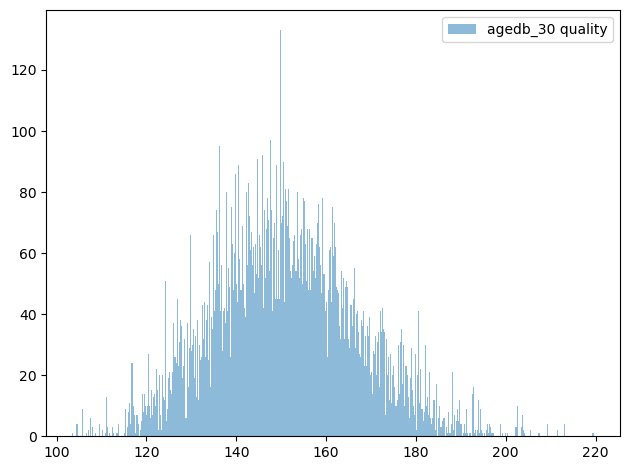

In [13]:
cc = tf.norm(ee.embs, axis=1).numpy()
_ = plt.hist(cc, bins=512, alpha=0.5, label='agedb_30 quality')
plt.legend()
plt.tight_layout()